## **Load data**

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [71]:
%pwd
%cd 'gdrive/My Drive/bladder cancer'
%ls

[Errno 2] No such file or directory: 'gdrive/My Drive/bladder cancer'
/content/gdrive/My Drive/bladder cancer
'Baseline ECOG Score.png'  'tree_Baseline ECOG Score.dot'
'Immune phenotype.png'     'tree_Baseline ECOG Score.png'
 IMvigor210_clin.csv       'tree_Immune phenotype.dot'
 imvigor210.csv            'tree_Immune phenotype.png'
 IMvigor210.xlsx            tree_Sex.dot
 Race.png                   tree_Sex.png
'TCGA Subtype.dot'         'tree_TCGA Subtype.png'
 tmm.csv


In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# xlsx = pd.read_excel('./IMvigor210.xlsx', sheet_name = 'TMM norm' )
# xlsx.to_csv('./tmm.csv',index=False)
# print(xlsx.columns)
%ls

'Baseline ECOG Score.png'  'tree_Baseline ECOG Score.dot'
'Immune phenotype.png'     'tree_Baseline ECOG Score.png'
 IMvigor210_clin.csv       'tree_Immune phenotype.dot'
 imvigor210.csv            'tree_Immune phenotype.png'
 IMvigor210.xlsx            tree_Sex.dot
 Race.png                   tree_Sex.png
'TCGA Subtype.dot'         'tree_TCGA Subtype.png'
 tmm.csv


In [74]:
data = pd.read_csv("IMvigor210_clin.csv")
print(data.columns)
print(len(data))

Index(['SampleID', 'Best Confirmed Overall Response', 'binaryResponse',
       'Enrollment IC', 'IC Level', 'TC Level', 'Immune phenotype',
       'FMOne mutation burden per MB', 'Sex', 'Race',
       'Intravesical BCG administered', 'Baseline ECOG Score',
       'Tobacco Use History', 'Met Disease Status', 'Sample age', 'Tissue',
       'Received platinum', 'Sample collected pre-platinum',
       'Neoantigen burden per MB', 'sizeFactor', 'ANONPT_ID', 'os', 'censOS',
       'Lund', 'Lund2', 'TCGA Subtype'],
      dtype='object')
348


In [75]:
marker = pd.read_csv("tmm.csv")
ori_marker = marker 

In [76]:
marker.columns

Index(['Entrez Gene ID', 'Symbol', 'SAMf2ce197162ce', 'SAM698d8d76b934',
       'SAMc1b27bc16435', 'SAM85e41e7f33f9', 'SAMf275eb859a39',
       'SAM7f0d9cc7f001', 'SAM4305ab968b90', 'SAMcf018fee2acd',
       ...
       'SAMe7e4f7c076a7', 'SAMbe25e2c88f3e', 'SAM4caabd64e7fd',
       'SAMc6eff056c89a', 'SAM5cfa1699bdb7', 'SAMda4d892fddc8',
       'SAM3a1c9632ff7b', 'SAM8b4b8b0f9e73', 'SAMe3d4266775a9',
       'SAM2de7cffb5f72'],
      dtype='object', length=350)

## **Data Preprocessing**

In [77]:
marker = marker.rename(columns = {'Symbol':'SampleID'}) 
marker = marker.drop(['Entrez Gene ID'], axis = 1).T
marker.columns = marker.iloc[0]
marker = marker.drop(marker.index[0])

In [78]:
print(marker.head())

SampleID            A1BG      ADA     CDH2  ...    DGCR2 CASP8AP2     SCO2
SAMf2ce197162ce  3.97148  10.2378  9.12886  ...  9.76685  11.1387  10.2317
SAM698d8d76b934  6.19179  10.3348  13.7274  ...   9.8475  11.4952  10.4029
SAMc1b27bc16435  3.56082   9.1993  5.63238  ...   9.9633  10.9028  9.24281
SAM85e41e7f33f9  3.88137  11.7038  9.27618  ...  9.56163     11.8  11.1349
SAMf275eb859a39  4.90625  10.1602  7.49974  ...  10.2516   11.416  10.5975

[5 rows x 17692 columns]


In [79]:
len(marker), len(marker.columns)

(348, 17692)

In [80]:
target_column = 'Immune phenotype'

In [81]:
## match non-digit labels to digits

# data['Best Confirmed Overall Response'] = data['Best Confirmed Overall Response'].map({'CR':0, 'PR':1, 'SD':2, 'PD':3, 'NE':4})
# data['Enrollment IC'] = data['Enrollment IC'].map({'IC0':0, 'IC1':1, 'IC2':2})

# NA = -1 -> nan 빼고 해보기
data['Immune phenotype'] = data['Immune phenotype'].map({'desert':0, 'inflamed':1, 'excluded':2})

# data['Sex'] = data['Sex'].map({'M':0, 'F':1})
# # NA = -1, rm 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER' since the number of it is 1
# data['Race'] = data['Race'].map({'BLACK OF AFRICAN AMERICAN':0, 'ASIAN':1, 'WHITE':2,  'OTHER':4})
# data['Race'] = data['Race'].fillna(-1)
# data['Intravesical BCG administered'] = data['Intravesical BCG administered'].map({'N':0, 'Y':1})
# data['Tobacco Use History'] = data['Tobacco Use History'].map({'NEVER':0, 'PREVIOUS':1, 'CURRENT':2})

# # # replace NA to the mean of N, Y
# # data['Met Disease Status'] = data['Met Disease Status'].map({'Liver':0, 'Visceral':1, 'LN Only':2, 'NA': -1})
# data['Sample age'] = data['Sample age'].map({'(less than) 1 year':0, '1-2 years':1, 'more than 2 years':2})
# data['Received platinum'] = data['Received platinum'].map({'N':0, 'Y':1})

# # replace NA to the mean of N, Y
# #data['Sample collected pre-platinum'] = data['Sample collected pre-platinum'].map({'N':0, 'Y':1, 'NA': 0.5})
# data['Lund'] = data['Lund'].map({'MS1a':0, 'MS1b':1, 'MS2a1':2,'MS2a2':3, 'MS2b1':4, 'MS2b2.1':5, 'MS2b2.2':6})
# data['Lund2'] = data['Lund2'].map({'UroA':0, 'UroB':1, 'Genomically unstable':3, 'Infiltrated':4, 'Basal/SCC-like':5})
# data['TCGA Subtype'] = data['TCGA Subtype'].map({'I':0, 'II':1, 'III':2, 'IV':3})     

# # replace NA to the mean of column 
# data['Neoantigen burden per MB'] = data['Neoantigen burden per MB'].fillna(data.mean()['Neoantigen burden per MB'])
# # replace NA to the mean of column 
# data['FMOne mutation burden per MB'] = data['FMOne mutation burden per MB'].fillna(data.mean()['FMOne mutation burden per MB'])

  

print(data[target_column])


0      NaN
1      2.0
2      2.0
3      1.0
4      2.0
      ... 
343    NaN
344    NaN
345    2.0
346    NaN
347    NaN
Name: Immune phenotype, Length: 348, dtype: float64


In [82]:
if target_column in marker.columns:
  marker = marker.drop(target_column, axis = 1)

In [83]:
data.index = data['SampleID']
marker.index.equals(data.index)

True

In [84]:
marker = marker.join(data[target_column])
marker = marker.reset_index()
marker = marker.rename(columns = {'index':'SampleID'}) 
marker.head()

,SampleID,A1BG,ADA,CDH2,AKT3,POU5F1P5,ZBTB11-AS1,MED6,NR2E3,NAALAD2,SNORD116-1,SNORD116-2,SNORD116-6,SNORD116-8,SNORD116-14,SNORD116-15,SNORD116-16,SNORD116-20,SNORD116-21,SNORD116-22,SNORD116-23,SNORD116-24,SNORD116-25,SNORD116-26,DDTL,NAALADL1,CDKN2B-AS1,SIGLEC14,ACOT8,ABI1,GNPDA1,KCNE3,ZBTB33,GTF2IP4,CDH3,TANK,POM121C,ZSCAN30,MCTS2P,SRA1,...,CDC25C,GOLGA5,HS3ST3B1,HS3ST3A1,HS3ST2,HS3ST1,USP15,CDC27,USP3,MVP,SLC23A2,SLC23A1,TNFSF15,THRAP3,MED12,MED13,CDC34,NR1H4,NUP153,CCS,NR1D2,CLEC2B,RBX1,CDC42,DOP1B,FGFBP1,THOC1,REC8,RCE1,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2,Immune phenotype
0,SAMf2ce197162ce,3.97148,10.2378,9.12886,10.7241,7.3897,1.97723,9.09632,3.4958,5.62838,7.31183,1.30374,5.93584,0,3.58678,4.57074,2.22395,5.39654,1.67944,4.88944,8.22823,9.25732,4.1006,3.58678,4.88944,5.49379,3.06064,5.91843,6.54731,11.8771,9.37369,7.51662,11.212,8.36947,12.9403,11.2477,10.4892,7.3897,7.3897,8.57512,...,8.09896,11.478,3.97148,1.67944,4.57074,7.35776,11.3895,10.9476,11.6579,10.884,11.4909,0.794389,5.39654,12.3514,13.1151,13.7472,9.89811,6.93271,13.7003,7.9484,11.3045,9.71611,10.6462,10.8268,12.176,3.18234,10.739,7.26438,8.34687,13.3753,11.5898,12.1645,15.7093,12.7483,13.4474,2.61833,9.76685,11.1387,10.2317,NaN
1,SAM698d8d76b934,6.19179,10.3348,13.7274,11.8855,5.76731,1.77834,9.5023,2.08421,4.70671,8.59474,2.55106,6.64144,3.05154,5.06196,4.03492,2.08421,6.79668,3.52749,5.76731,9.38659,10.162,5.09653,5.06196,4.91475,5.83029,2.73785,6.79668,6.17571,11.2499,9.61986,5.48368,10.9472,8.09806,11.7468,10.5575,10.8127,8.34448,6.78613,8.94704,...,8.45185,11.6639,2.73785,2.33644,8.20094,5.53499,11.3293,11.0412,10.4973,11.462,9.473,2.08421,4.66125,13.0605,12.9927,12.7929,10.7407,1.38968,13.4348,8.98674,9.88259,8.48158,10.9961,10.8606,11.704,0,11.0561,9.30764,8.30807,12.5417,12.284,11.7372,13.5991,11.7458,12.0886,3.05154,9.8475,11.4952,10.4029,2.0
2,SAMc1b27bc16435,3.56082,9.1993,5.63238,9.97882,6.66971,3.32203,9.37385,1.4855,2.67817,8.15695,5.46609,7.31662,1.4855,5.34352,5.52367,4.80746,6.44967,0,6.56388,8.9118,9.17254,5.06189,5.06189,6.00011,3.03572,1.4855,6.25938,7.4414,11.5368,9.45749,6.47908,11.7335,8.96474,10.8795,11.4194,10.5753,6.59107,6.74427,8.13864,...,8.21054,11.9173,2.20172,2.20172,3.03572,7.92017,11.6381,11.3752,12.2196,10.6882,12.2071,5.4061,5.91659,12.7454,13.22,13.8861,10.8878,4.80746,12.7835,7.67536,11.7918,8.64613,10.6156,11.7456,12.3472,0,10.2373,7.30024,7.98311,12.9666,11.4569,11.3791,15.5232,11.8236,13.9629,0,9.9633,10.9028,9.24281,2.0
3,SAM85e41e7f33f9,3.88137,11.7038,9.27618,11.1349,6.1579,2.14869,9.15104,2.14869,4.37483,5.17796,1.83822,4.25019,0,1.44208,2.14869,0,4.18359,0.894188,2.97609,6.45475,7.85234,2.62091,0.894188,0,3.96307,3.26087,7.46765,7.03894,11.7277,9.04951,5.89196,10.9337,8.06153,15.0576,11.6926,10.9132,8.58143,6.64003,8.98985,...,8.31591,11.5379,4.04038,3.79478,4.43333,6.56352,11.9468,11.3846,10.735,12.0241,8.93776,2.97609,6.53708,12.8946,12.8183,13.1813,9.78585,5.27712,13.4875,8.36933,9.70505,10.8748,10.624,10.7878,11.3934,8.60389,11.0416,9.57793,9.00198,12.6481,12.1515,12.3973,15.1202,13.0617,12.9823,2.62091,9.56163,11.8,11.1349,1.0
4,SAMf275eb859a39,4.90625,10.1602,7.49974,9.62024,6.76629,1.88613,9.12538,3.71523,5.79708,8.12622,2.82109,5.50751,4.2631,5.14484,4.36101,3.474,6.42522,0,5.46411,8.93584,9.34167,4.53888,4.77031,0,4.45268,3.073,5.14484,6.12431,12.0255,10.8691,5.83165,11.1274,9.25041,12.9814,12.0055,10.701,7.97208,6.73011,8.78306,...,6.37923,12.2804,3.63921,0,2.67646,9.09547,12.0987,11.1265,11.3188,12.1944,12.4287,3.18417,8.66583,12.7132,12.5897,13.3354,9.63744,2.67646,12.9693,8.04386,11.8697,12.2113,10.6119,11.4677,11.5236,3.18417,10.7544,9.09369,7.83399,13.2014,12.3724,12.4545,15.2666,13.831,13.0864,2.12781,10.2516,11.416,10.5975,2.0


In [85]:
marker.index

RangeIndex(start=0, stop=348, step=1)

In [86]:
marker = marker.dropna(axis=0)
marker.shape

(284, 17694)

In [87]:
marker.reset_index(inplace=True, drop=True)
marker.index

RangeIndex(start=0, stop=284, step=1)

In [88]:
######17694 check
marker.shape

(284, 17694)

In [89]:
# split train and test data
# 5-fold cross validation

train_list = []
test_list = []

from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=5, shuffle=False, random_state=1004)

for train_idx, test_idx in fold.split(marker, marker[target_column]):
    # print("TRAIN:", train_idx, "\nTEST:", test_idx)
    train_list.append(marker.loc[train_idx])
    test_list.append(marker.loc[test_idx])

print(len(train_list), len(test_list))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


5 5


In [90]:
# groupby 1 df

print(train_list[0].groupby(target_column).size())
print(test_list[0].groupby(target_column).size()) 

Immune phenotype
0.0     61
1.0     59
2.0    107
dtype: int64
Immune phenotype
0.0    15
1.0    15
2.0    27
dtype: int64


In [91]:
# check the average number of total 5 training data per class
total_train = pd.concat([train_list[0], train_list[1], train_list[2], train_list[3], train_list[4]], axis=0, ignore_index=True)
print(total_train.groupby(target_column).size())
print('\n', total_train.groupby(target_column).size()/5)

Immune phenotype
0.0    304
1.0    296
2.0    536
dtype: int64

 Immune phenotype
0.0     60.8
1.0     59.2
2.0    107.2
dtype: float64


In [92]:
# check the average number of total 5 test data per class
total_test = pd.concat([test_list[0], test_list[1], test_list[2], test_list[3], test_list[4]], axis=0, ignore_index=True)
print(total_test.groupby(target_column).size())
print('\n', total_test.groupby(target_column).size()/5)

Immune phenotype
0.0     76
1.0     74
2.0    134
dtype: int64

 Immune phenotype
0.0    15.2
1.0    14.8
2.0    26.8
dtype: float64


In [93]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()

In [94]:
x_train_list, x_test_list, y_train_list, y_test_list = [], [], [], []
decoded_y_train_list, decoded_y_test_list = [], []

In [95]:
for (train, test) in zip(train_list, test_list): 
  decoded_y_train = train[target_column]
  Y = encoder.fit_transform(decoded_y_train)
  y_train = pd.get_dummies(Y).values

  decoded_y_test = test[target_column]
  Y = encoder.fit_transform(decoded_y_test)
  y_test = pd.get_dummies(Y).values

  x_train = train.drop([target_column], axis = 1)
  x_test = test.drop([target_column], axis = 1)

  features = marker.columns.tolist()
  features.remove(target_column)
  features.remove('SampleID')

  x_train.set_index(x_train['SampleID'], inplace=True, drop=True)
  x_test.set_index(x_test['SampleID'], inplace=True, drop=True)

  x_train.drop(['SampleID'], axis=1, inplace=True)
  x_test.drop(['SampleID'], axis=1, inplace=True)
  x_train.reset_index(drop=True, inplace=True)
  x_test.reset_index(drop=True, inplace=True)

  x_test = np.asarray(x_test).astype(np.float32)
  x_train = np.asarray(x_train).astype(np.float32)

  x_train_list.append(x_train)
  x_test_list.append(x_test)
  y_train_list.append(y_train)
  y_test_list.append(y_test)
  decoded_y_train_list.append(decoded_y_train)
  decoded_y_test_list.append(decoded_y_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [98]:
from keras import backend as K
import tensorflow as tf

def result(one_pred, y_test):
  acc, rec, pre = [], [], []
  
  for target_class in range(y_test.shape[1]):
    """RECALL"""

    tp = K.sum(one_pred[:, target_class] * y_test[:, target_class])  #dtype=float32
    tpfn = tf.cast(K.sum(y_test[:, target_class]), tf.float32)  #uint8 to float32

    # Recall =  (True Positive) / (True Positive + False Negative)
    recall = tp / (tpfn + K.epsilon())

    """PRECISION"""

    tpfp = tf.cast(K.sum(one_pred[:, target_class]), tf.float32)

    # Precision = (True Positive) / (True Positive + False Positive)
    precision = tp / (tpfp + K.epsilon())

    """Accuracy"""
    tn = np.sum((one_pred[:, target_class]==0) * (y_test[:, target_class]==0).T)

    accuracy = (tp + tn)/(tpfn + tpfp - tp + tn)

    acc.append(accuracy)
    rec.append(recall)
    pre.append(precision)

    print("\nclass: ", target_class)
    print("tp: ", tp)
    print("tp+fn: ", tpfn)
    print("tp+fp: ", tpfp)

    tf.print("Accuracy = {:.3f}".format(accuracy))
    tf.print("Recall = {:.3f}".format(recall))
    tf.print("Precision = {:.3f} ".format(precision))

  return acc, rec, pre

# **Neural Networks**

In [73]:
one_pred_list = []

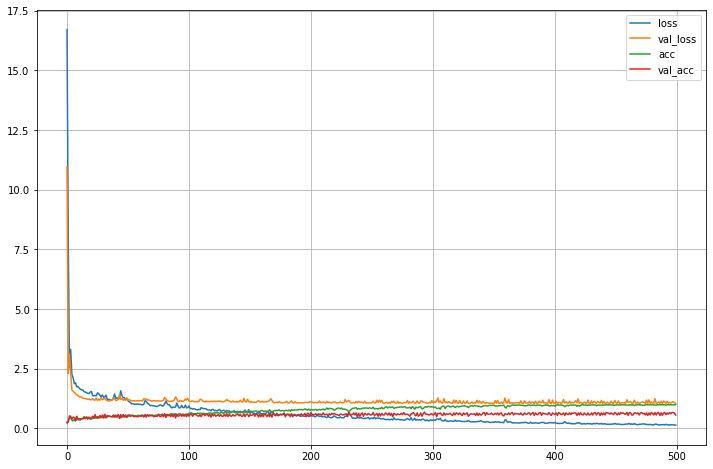

2/2 [==============================] - 0s 3ms/step


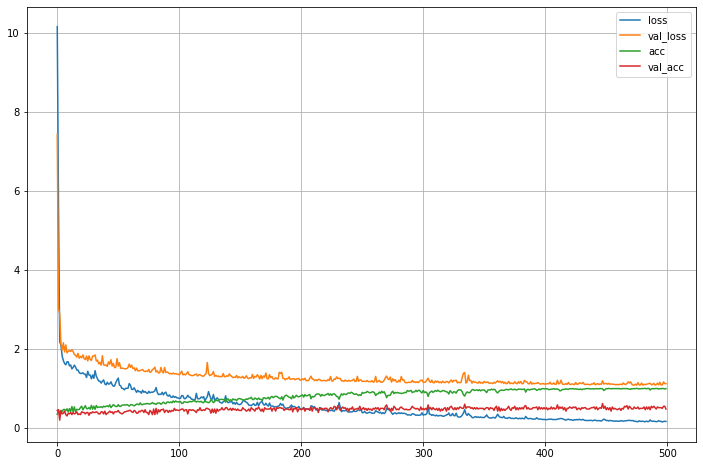

2/2 [==============================] - 0s 3ms/step


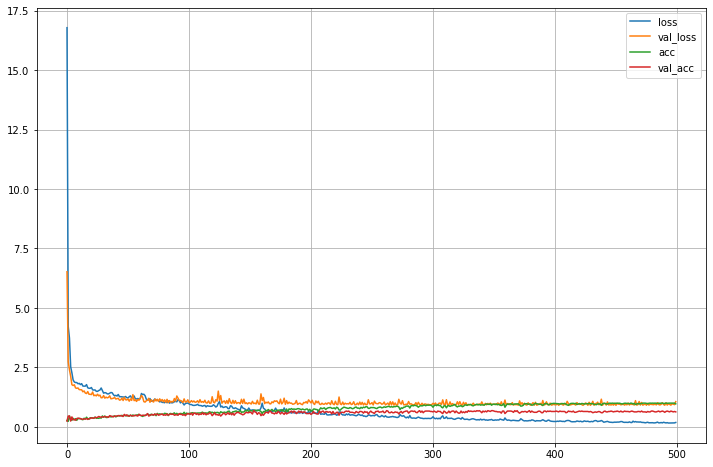

2/2 [==============================] - 0s 3ms/step


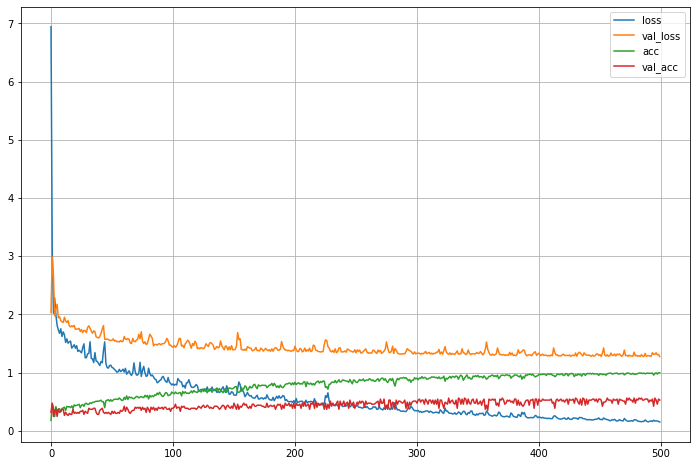

2/2 [==============================] - 0s 3ms/step


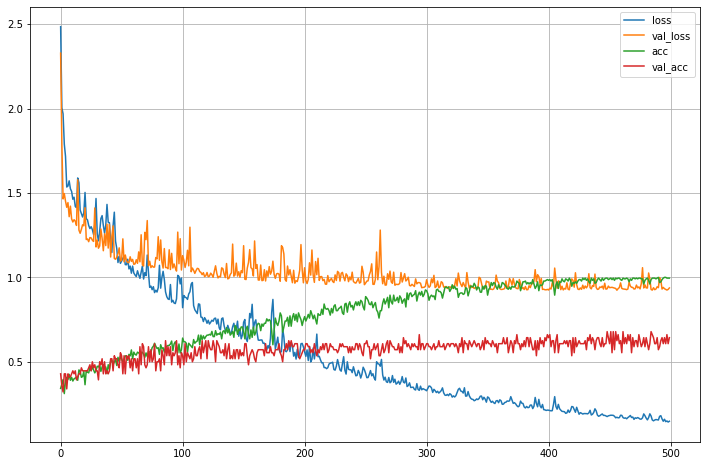

2/2 [==============================] - 0s 3ms/step


In [74]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import EarlyStopping
%matplotlib inline

# EarlyStopping = EarlyStopping(monitor='val_loss', patience=20)

for (x_train, x_test, y_train, y_test) in zip(x_train_list, x_test_list, y_train_list, y_test_list):

  model = Sequential()

  model.add(Dense(y_train.shape[1], input_shape=(len(features),), activation='softmax'))

  opt = Adam(learning_rate=0.00001)
  model.compile(loss='categorical_crossentropy', 
                optimizer=opt, 
                metrics=['accuracy']) 


  # model.summary()

  hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=500, verbose=0)

  plt.figure(figsize=(12,8))
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.legend(['loss','val_loss', 'acc','val_acc'])
  plt.grid()
  plt.show()

  prediction = model.predict(x_test, verbose=1)
  one_pred = np.zeros_like(prediction)
  # one hot encoding of prediction
  one_pred[np.arange(len(prediction)), prediction.argmax(1)] = 1
  one_pred_list.append(one_pred)

In [76]:
# import tensorflow as tf
# tf.test.gpu_device_name()

In [77]:
# for one_pred, y_test in zip(one_pred_list, y_test_list):
#   print(one_pred.shape)
#   print(y_test.shape)

In [78]:
acc_list, rec_list, pre_list = [], [], []

for one_pred, y_test in zip(one_pred_list, y_test_list):
  acc, rec, pre = result(one_pred, y_test)
  acc_list.append(acc)
  rec_list.append(rec)
  pre_list.append(pre)


class:  0
tp:  tf.Tensor(7.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(16.0, shape=(), dtype=float32)
Accuracy = 0.702
Recall = 0.467
Precision = 0.438 

class:  1
tp:  tf.Tensor(8.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(12.0, shape=(), dtype=float32)
Accuracy = 0.807
Recall = 0.533
Precision = 0.667 

class:  2
tp:  tf.Tensor(17.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(27.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(29.0, shape=(), dtype=float32)
Accuracy = 0.614
Recall = 0.630
Precision = 0.586 

class:  0
tp:  tf.Tensor(4.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(11.0, shape=(), dtype=float32)
Accuracy = 0.684
Recall = 0.267
Precision = 0.364 

class:  1
tp:  tf.Tensor(6.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(10.0, shape=(), dtype=float32)
Accuracy = 0.772
Recall =

In [79]:
# number of class
for i in range(y_test_list[0].shape[1]):
  acc_mean, rec_mean, pre_mean = 0, 0, 0
  
  # k-fold
  for j in range(len(acc_list)):  
    acc_mean += acc_list[j][i]
    rec_mean += rec_list[j][i]
    pre_mean += pre_list[j][i]
  
  acc_mean /= len(acc_list)
  rec_mean /= len(rec_list)
  pre_mean /= len(pre_list)

  print("\nclass: ", i)
  # mean score of k-folds
  tf.print("Accuracy = {:.3f}".format(acc_mean))
  tf.print("Recall = {:.3f}".format(rec_mean))
  tf.print("Precision = {:.3f} ".format(pre_mean))


class:  0
Accuracy = 0.740
Recall = 0.514
Precision = 0.503 

class:  1
Accuracy = 0.785
Recall = 0.553
Precision = 0.602 

class:  2
Accuracy = 0.609
Recall = 0.605
Precision = 0.609 


In [80]:
len(acc_list)

5

# **SVM**

In [96]:
acc_list, rec_list, pre_list = [], [], []

In [99]:
# Support Vector Classifier
# one vs rest

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

for x_train, decoded_y_train, x_test, y_test in zip(x_train_list, decoded_y_train_list, x_test_list, y_test_list):
  svm = OneVsRestClassifier(SVC()).fit(x_train, decoded_y_train)
  y_pred_svc = svm.predict(x_test)

  # print(y_pred_svc)

  # encode y_pred_svc to one-hot vector 
  Y = encoder.fit_transform(y_pred_svc)
  y_pred_svc = pd.get_dummies(Y).values.astype(np.float32)

  acc, rec, pre = result(y_pred_svc, y_test)
  acc_list.append(acc)
  rec_list.append(rec)
  pre_list.append(pre)

5
5
5
5

class:  0
tp:  tf.Tensor(7.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(9.0, shape=(), dtype=float32)
Accuracy = 0.825
Recall = 0.467
Precision = 0.778 

class:  1
tp:  tf.Tensor(4.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(4.0, shape=(), dtype=float32)
Accuracy = 0.807
Recall = 0.267
Precision = 1.000 

class:  2
tp:  tf.Tensor(25.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(27.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(44.0, shape=(), dtype=float32)
Accuracy = 0.632
Recall = 0.926
Precision = 0.568 

class:  0
tp:  tf.Tensor(6.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(8.0, shape=(), dtype=float32)
Accuracy = 0.807
Recall = 0.400
Precision = 0.750 

class:  1
tp:  tf.Tensor(2.0, shape=(), dtype=float32)
tp+fn:  tf.Tensor(15.0, shape=(), dtype=float32)
tp+fp:  tf.Tensor(3.0, shape=(), dtype=float32)
Accuracy = 0.754
Reca

In [100]:
# number of class
for i in range(y_test_list[0].shape[1]):
  acc_mean, rec_mean, pre_mean = 0, 0, 0
  
  # k-fold
  for j in range(len(acc_list)):  
    acc_mean += acc_list[j][i]
    rec_mean += rec_list[j][i]
    pre_mean += pre_list[j][i]
  
  acc_mean /= len(acc_list)
  rec_mean /= len(rec_list)
  pre_mean /= len(pre_list)

  print("\nclass: ", i)
  # mean score of k-folds
  tf.print("Accuracy = {:.3f}".format(acc_mean))
  tf.print("Recall = {:.3f}".format(rec_mean))
  tf.print("Precision = {:.3f} ".format(pre_mean))


class:  0
Accuracy = 0.813
Recall = 0.409
Precision = 0.799 

class:  1
Accuracy = 0.789
Recall = 0.255
Precision = 0.792 

class:  2
Accuracy = 0.609
Recall = 0.911
Precision = 0.553 


In [ ]:
# output개수가 0인 class가 있을 때 add [0]*y_pred_svc.shape[0]

# new_column = [0] * y_pred_svc.shape[0]
# y_pred_svc = np.insert(y_pred_svc, 2, new_column, axis=1)
# y_pred_svc